In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [92]:
df_permintaan_darah = pd.read_excel(
    'Permintaan-Darah-Dataset-test.xlsx',
    sheet_name='Sheet1',
    header=[0, 1, 2],
    index_col=0,
)

df_permintaan_darah = df_permintaan_darah.fillna(0)
df_permintaan_darah = df_permintaan_darah.head(12)
df_permintaan_darah

Permintaan Darah (Kantong)                                     \
Golongan                           A                                      
Bulan                           2012   2013   2014   2015   2020   2022   
Januari                        300.0  278.0  414.0  263.0  318.0  277.0   
Pebruari                       293.0  303.0  284.0  346.0  296.0  210.0   
Maret                          239.0  307.0  373.0  303.0  313.0  296.0   
April                          209.0  349.0  376.0  308.0  227.0  297.0   
Mei                            274.0  330.0  344.0  271.0  186.0  288.0   
Juni                           215.0  245.0  338.0  306.0  287.0  252.0   
Juli                           212.0  276.0  223.0  279.0  255.0  254.0   
Agustus                        281.0  243.0  253.0  297.0  157.0  335.0   
September                      241.0  305.0  296.0  270.0  272.0  294.0   
Oktober                        237.0  300.0  338.0  375.0  260.0  307.0   
Nopember                       258.0  368.0  323.0  333.0  259.0  376.0   
Desember                       218.0  309.0  345.0  363.0  224.0  331.0   

                                       ...                                    \
Golongan              B                ...      O                  AB          
Bulan       2023   2012   2013   2014  ...   2020   2022   2023  2012   2013   
Januari    347.0  405.0  355.0  447.0  ...  579.0  448.0  544.0  92.0   73.0   
Pebruari   289.0  355.0  387.0  454.0  ...  486.0  373.0  410.0  77.0   94.0   
Maret      307.0  375.0  434.0  440.0  ...  508.0  570.0  538.0  87.0   66.0   
April      279.0  340.0  414.0  412.0  ...  340.0  421.0  452.0  62.0   74.0   
Mei        320.0  307.0  409.0  420.0  ...  499.0  594.0  628.0  77.0  101.0   
Juni       310.0  266.0  267.0  481.0  ...  461.0  458.0  395.0  35.0   56.0   
Juli       331.0  240.0  390.0  246.0  ...  503.0  465.0  536.0  81.0   86.0   
Agustus    322.0  345.0  302.0  402.0  ...  395.0  528.0  424.0  46.0   49.0   
September  273.0  335.0  390.0  390.0  ...  388.0  529.0  422.0  80.0   78.0   
Oktober    329.0  305.0  374.0  445.0  ...  420.0  469.0  458.0  80.0   69.0   
Nopember   332.0  388.0  499.0  420.0  ...  405.0  575.0  427.0  74.0  103.0   
Desember   304.0  324.0  359.0  462.0  ...  471.0  499.0  590.0  59.0   87.0   

                                              
Golongan                                      
Bulan       2014   2015   2020   2022   2023  
Januari    131.0  114.0   96.0   58.0  123.0  
Pebruari    97.0   82.0   93.0   88.0   90.0  
Maret       93.0  100.0   87.0   66.0  114.0  
April       80.0  114.0   69.0   97.0   80.0  
Mei         87.0   90.0   59.0   95.0   98.0  
Juni        73.0  118.0   85.0   98.0   58.0  
Juli        56.0   71.0  102.0   84.0   76.0  
Agustus     63.0   71.0   64.0  114.0   83.0  
September  112.0   77.0   86.0  100.0   90.0  
Oktober     90.0  135.0   73.0   67.0  113.0  
Nopember    92.0   87.0   91.0  119.0   76.0  
Desember   114.0   99.0   76.0   83.0  127.0  

[12 rows x 28 columns]

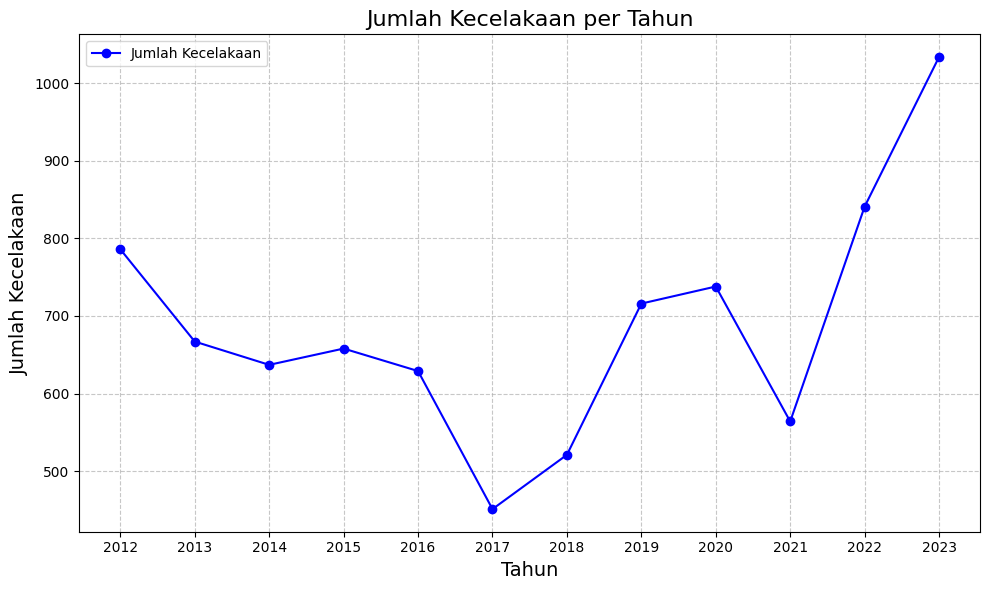

In [86]:
df_lakalantas = pd.read_excel('Jumlah-Lakalantas.xlsx', header=None)
tahun_kecelakaan = df_lakalantas.iloc[0, 0:].astype(int)
jumlah_kecelakaan = df_lakalantas.iloc[1, 0:].astype(int)

plt.figure(figsize=(10, 6))
plt.plot(tahun_kecelakaan, jumlah_kecelakaan, marker='o', linestyle='-', color='b', label="Jumlah Kecelakaan")
plt.title("Jumlah Kecelakaan per Tahun", fontsize=16)
plt.xlabel("Tahun", fontsize=14)
plt.ylabel("Jumlah Kecelakaan", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(tahun_kecelakaan)  # Menampilkan label tahun sesuai data
plt.tight_layout()
plt.show()

In [87]:
# Melakukan uji ADF pada jumlah kecelakaan
result = adfuller(jumlah_kecelakaan)

# Menampilkan hasil uji
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

# Interpretasi
if result[1] <= 0.05:
    print("\nData bersifat stasioner (tolak H0)")
else:
    print("\nData tidak bersifat stasioner (gagal tolak H0)")

ADF Statistic: -4.877534748501667
p-value: 3.856124348861079e-05
Critical Values:
   1%: -4.9386902332361515
   5%: -3.477582857142857
   10%: -2.8438679591836733

Data bersifat stasioner (tolak H0)


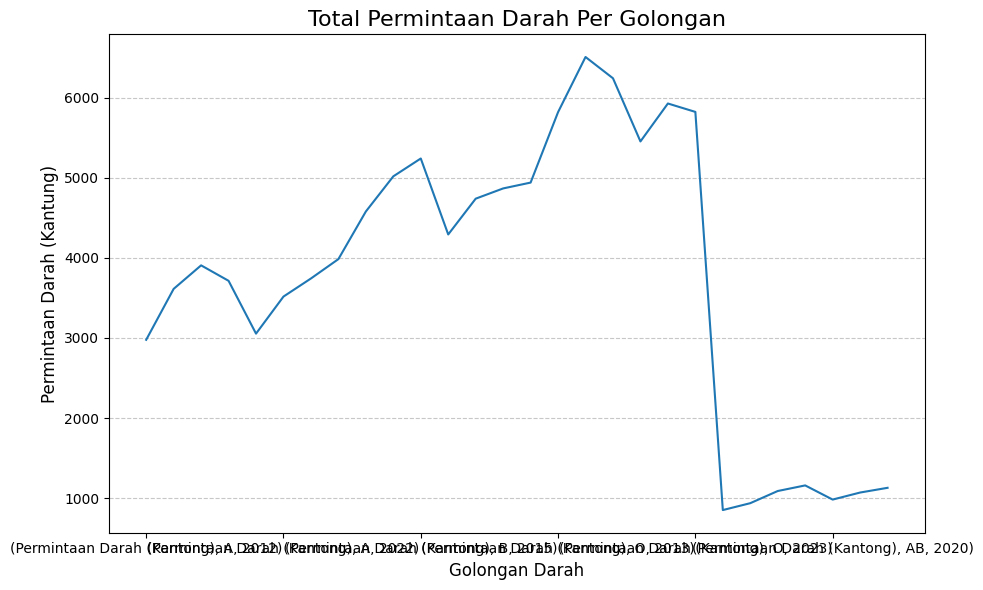

In [99]:
df_permintaan_darah_sum = df_permintaan_darah.sum()

# Mengubah data menjadi format pivot agar lebih mudah diproses
plt.figure(figsize=(10, 6))
df_permintaan_darah_sum.plot()

# Menambahkan label dan judul
plt.title('Total Permintaan Darah Per Golongan', fontsize=16)
plt.xlabel('Golongan Darah', fontsize=12)
plt.ylabel('Permintaan Darah (Kantung)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [75]:
# Mengatur indeks menjadi tahun agar sesuai dengan time series
df_permintaan_darah_sum.index = pd.to_datetime(df_permintaan_darah_sum.index, format='%Y')

df_permintaan_darah_sum

ValueError: time data "('Permintaan Darah (Kantong)', 'A', 2012)" doesn't match format "%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.